In [72]:
import pandas as pd
import numpy as np
import statistics as st
file=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [73]:
def data_clean(f):
    if f.columns.isin(['Unnamed: 0']).sum()!=0:
        f=f.drop('Unnamed: 0', axis=1)
    cname=f.columns
    for x in cname:
        if f[x].isna().sum()!=0:
            if f[x].dtype=='object':
                # fills NaNs of the object.list with the mode of the list 
                f[x]=f[x].fillna(st.mode(f[x]))
            
            else:
                # fills NaNs of the number.list with mean of the list 
                f[x]=f[x].fillna(np.mean(f[x]))
                
                f[f[x].isna()==True][x]=[f[x].mean()]*f[x].isna().sum()

    return f


In [74]:
file=data_clean(file)
print(file.isna().sum())
print(file['Vehicle Type'].value_counts(dropna=False))


Customer                            0
State                               0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
Vehicle Type                     5482
dtype: int64
NaN    5482
A      5428
Name: Vehicle

Vehicle Type has more NaNs as entrys. The rest Entries only have the value A. 
=>Vehicle Type column can be droped

In [75]:

file=file.drop(['Vehicle Type'], axis=1)
print(file.isna().sum())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [76]:

#date_time_task
file['Effective To Date']=pd.to_datetime(file['Effective To Date'], errors='coerce')
file['Month']=file['Effective To Date'].apply(lambda x: x.month)
print(file.dtypes)
print(file['Month'].value_counts())
#All dates are from the 1. Quarter of the year
file.to_csv('csv_files/marketing_customer_analysis1.csv',index=False)

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

Round 3

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
file=pd.read_csv('csv_files/marketing_customer_analysis1.csv')

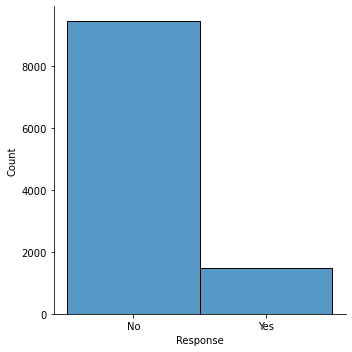

In [78]:
sns.displot(file['Response'])
plt.show()

[0.1800533851007037, 0.10322279308734236, 0.10787557908669755, 0.1088560885608856] ['Agent' 'Call Center' 'Branch' 'Web']


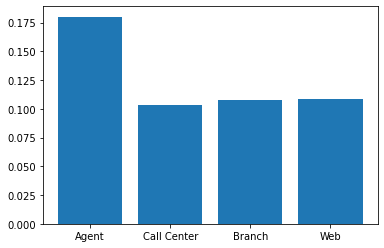

In [79]:
u1=file['Sales Channel'].value_counts()
filey=file[file['Response']=='Yes']
u2=filey['Sales Channel'].value_counts()
# print(u2)
#pd.to_numeric(u2,downcast='float')
y1=[]
for x in file['Sales Channel'].unique():
    y1.append(float(u2[x])/float(u1[x]))

#     #u2[x]=float(u2[x])/float(u1[x])
print(y1,file['Sales Channel'].unique())
# #u2=y1
plt.bar(file['Sales Channel'].unique(),y1)
plt.show()
# #pd.DataFrame()
# sns.displot(filey['Sales Channel'])
# plt.show()

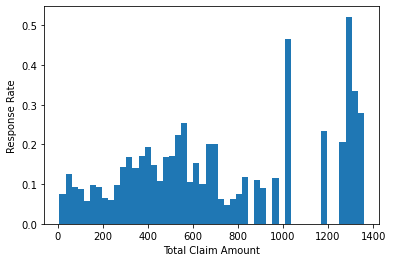

In [80]:

# Bincration found in : https://stackoverflow.com/questions/1721273/howto-bin-series-of-float-values-into-histogram-in-python

hisy, binedge=np.histogram(filey['Total Claim Amount'],bins=50)
his, binedge=np.histogram(file['Total Claim Amount'],bins=binedge)

x,y=[],[]
for i in range(len(his)):
    x.append(np.mean([binedge[i],binedge[i+1]]))
    if hisy[i]==0:
        y.append(0.)
    else:
        y.append(float(hisy[i])/float(his[i]))

plt.bar(x,y,width=binedge[1]-binedge[0])
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.show()
#print(x,y)
# dict={'No':0.,'Yes':1.}
# file['Response']=file['Response'].apply(lambda x: dict[x])
# print(file.columns)

Round 4

In [81]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
file=pd.read_csv('csv_files/marketing_customer_analysis1.csv')

file['Effective To Date']=pd.to_datetime(file['Effective To Date'], errors='coerce').astype(np.int64)
numerical=file.select_dtypes(include = np.number)
categoricals=file.select_dtypes(include = object)
numerical.head()

C:\Users\lahrm\AppData\Local\Temp/ipykernel_10436/577571231.py:7: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  file['Effective To Date']=pd.to_datetime(file['Effective To Date'], errors='coerce').astype(np.int64)


,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,4809.216960,1297987200000000000,48029,61,7.000000,52,0.000000,9,292.800000,2
1,2228.525238,1295308800000000000,0,64,3.000000,26,0.000000,1,744.924331,1
2,14947.917300,1297296000000000000,22139,100,34.000000,31,0.000000,2,480.000000,2
3,22332.439460,1294704000000000000,49078,97,10.000000,3,0.000000,2,484.013411,1
4,9025.067525,1295222400000000000,23675,117,15.149071,31,0.384256,7,707.925645,1


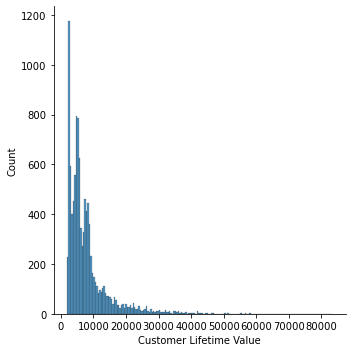

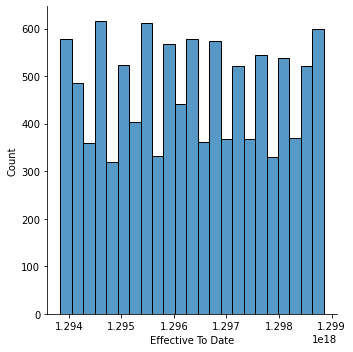

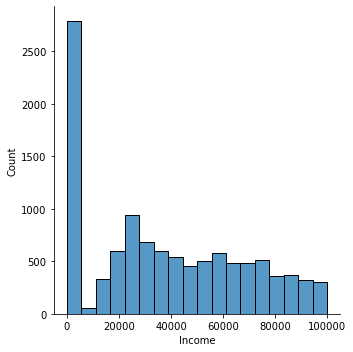

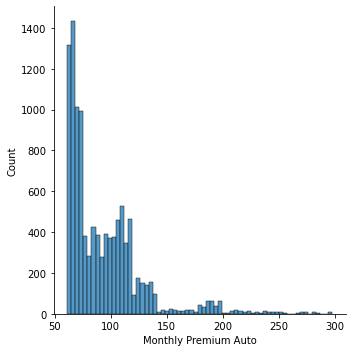

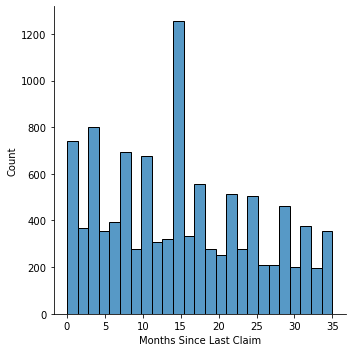

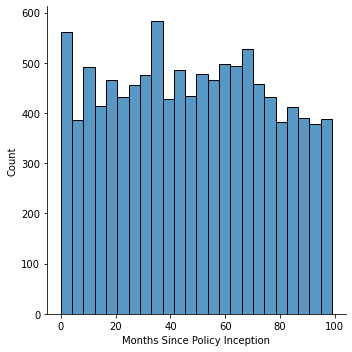

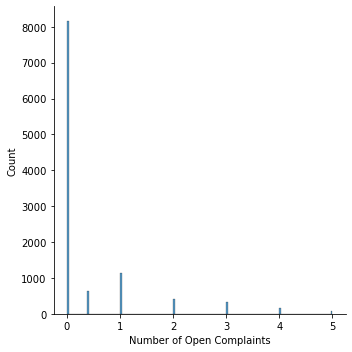

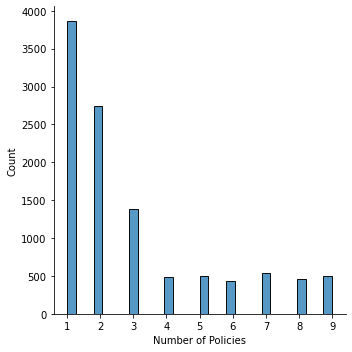

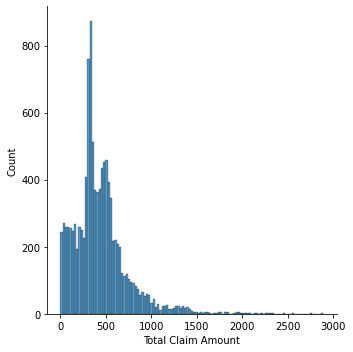

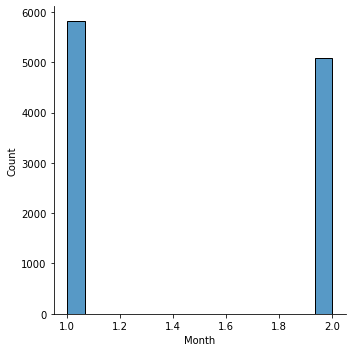

In [82]:

c=numerical.columns
for x in c:
    sns.displot(numerical[x])
    plt.show()

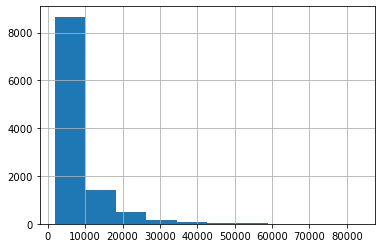

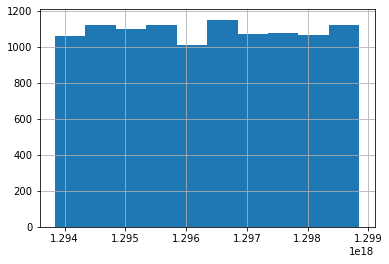

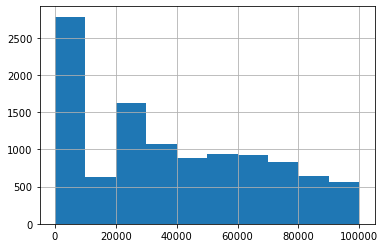

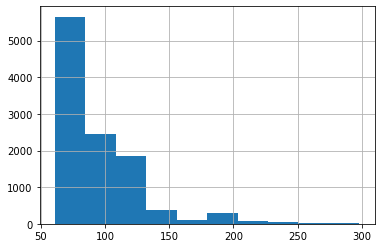

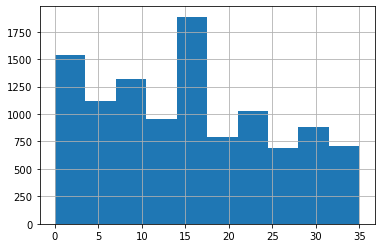

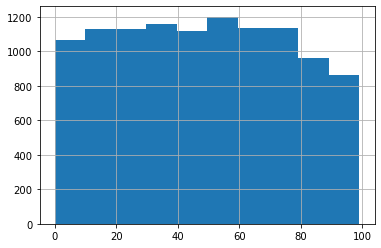

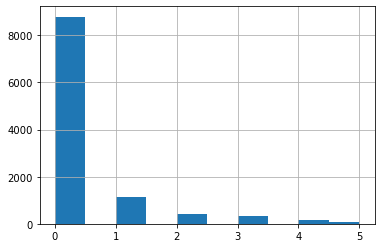

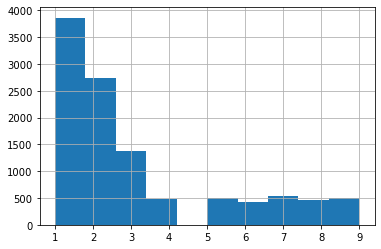

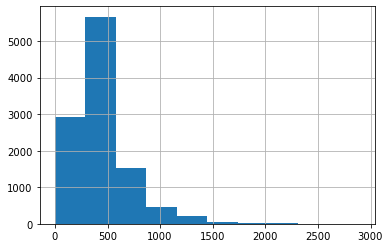

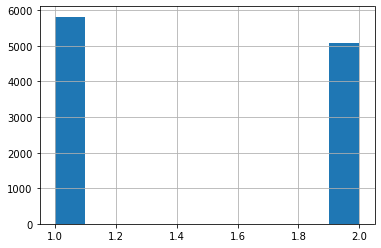

In [83]:
for x in c:
    numerical[x].hist()
    plt.show()

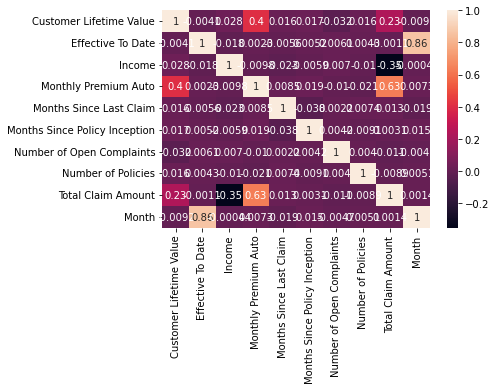

In [84]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Month is a value which can be derived from Effective To Date. => High Correlation, can be droped

In [85]:
numerical=numerical.drop(['Month'], axis=1)


Round 5

In [86]:
import numpy as np

# file=pd.read_csv('csv_files/marketing_customer_analysis1.csv')
y=file['Total Claim Amount']
X=file.drop(['Total Claim Amount'],axis=1)
X_numerical=X.select_dtypes(include = np.number)
X_categoricals=X.select_dtypes(include = object)


In [87]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_numerical)
X_standardized = transformer.transform(X_numerical)
X_standardized=pd.DataFrame(X_standardized, columns=X_numerical.columns)
X_standardized.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month
0,-0.466105,1.125028,0.345635,-0.934819,-0.832977,0.139877,-4.339189e-01,2.509455,1.068914
1,-0.840946,-0.705863,-1.236462,-0.847713,-1.241846,-0.790709,-4.339189e-01,-0.824922,-0.935529
2,1.006523,0.652540,-0.507194,0.197554,1.926893,-0.611750,-4.339189e-01,-0.408125,1.068914
3,2.079112,-1.119290,0.380189,0.110448,-0.526325,-1.613919,-4.339189e-01,-0.408125,-0.935529
4,0.146240,-0.764924,-0.456597,0.691152,0.000000,-0.611750,-6.268564e-17,1.675860,-0.935529


Round 6 

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

X_categoricals.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


Customer is a random generated code and is for every entry different.

In [89]:
X_categoricals=X_categoricals.drop(['Customer'], axis=1)

In [90]:

X_ch=pd.DataFrame(X_categoricals['State'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['California'],axis=1)
X_f=pd.concat([X_standardized,onehot_encoded], axis=1)

In [91]:
X_ch=pd.DataFrame(X_categoricals['Response'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['No'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)


In [92]:
X_ch=pd.DataFrame(X_categoricals['Gender'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['F'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)

In [93]:
X_ch=pd.DataFrame(X_categoricals['Marital Status'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['Married'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)
#X_ch.value_counts()

Policy Type is a summarized version of Policy=> no further used is needed

In [94]:
X_ch=pd.DataFrame(X_categoricals['Policy'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['Personal L3'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)
#X_ch.value_counts()

In [95]:
X_ch=pd.DataFrame(X_categoricals['Sales Channel'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['Agent'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)
#X_ch.value_counts()

In [96]:
X_ch=pd.DataFrame(X_categoricals['Vehicle Class'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['Four-Door Car'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)
#X_ch.value_counts()

In [97]:
X_ch=pd.DataFrame(X_categoricals['EmploymentStatus'])
encoder = OneHotEncoder().fit(X_ch)
encoded = encoder.transform(X_ch).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded=onehot_encoded.drop(['Employed'],axis=1)
X_f=pd.concat([X_f,onehot_encoded], axis=1)

In [98]:
X_f.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month,"(Arizona,)",...,"(Web,)","(Luxury Car,)","(Luxury SUV,)","(SUV,)","(Sports Car,)","(Two-Door Car,)","(Disabled,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,-0.466105,1.125028,0.345635,-0.934819,-0.832977,0.139877,-4.339189e-01,2.509455,1.068914,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.840946,-0.705863,-1.236462,-0.847713,-1.241846,-0.790709,-4.339189e-01,-0.824922,-0.935529,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.006523,0.652540,-0.507194,0.197554,1.926893,-0.611750,-4.339189e-01,-0.408125,1.068914,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.079112,-1.119290,0.380189,0.110448,-0.526325,-1.613919,-4.339189e-01,-0.408125,-0.935529,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.146240,-0.764924,-0.456597,0.691152,0.000000,-0.611750,-6.268564e-17,1.675860,-0.935529,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
X_ch=pd.DataFrame(X_categoricals['Coverage'])
label_encoded=LabelEncoder().fit(X_ch).transform(X_ch)
label_encoded = pd.DataFrame(label_encoded,columns=X_ch.columns)
X_f=pd.concat([X_f,label_encoded], axis=1)
#X_ch.value_counts()

C:\Users\lahrm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [100]:
X_ch=pd.DataFrame(X_categoricals['Education'])
encoder=LabelEncoder().fit(X_ch)#.transform(X_ch)
encoder.classes_=np.array(['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'])
label_encoded=encoder.transform(X_ch)
label_encoded = pd.DataFrame(label_encoded,columns=X_ch.columns)
X_f=pd.concat([X_f,label_encoded], axis=1)
#X_ch.value_counts()

In [101]:
X_ch=pd.DataFrame(X_categoricals['Location Code'])
encoder=LabelEncoder().fit(X_ch)#.transform(X_ch)
encoder.classes_=np.array(['Rural', 'Suburban', 'Urban'])
label_encoded=encoder.transform(X_ch)
label_encoded = pd.DataFrame(label_encoded,columns=X_ch.columns)
X_f=pd.concat([X_f,label_encoded], axis=1)
#X_ch.value_counts()

In [102]:
X_ch=pd.DataFrame(X_categoricals['Renew Offer Type'])
encoder=LabelEncoder().fit(X_ch)#.transform(X_ch)
encoder.classes_=np.array(['Offer1', 'Offer2', 'Offer3', 'Offer4'])
label_encoded=encoder.transform(X_ch)
label_encoded = pd.DataFrame(label_encoded,columns=X_ch.columns)
X_f=pd.concat([X_f,label_encoded], axis=1)
#X_ch.value_counts()

In [103]:
X_ch=pd.DataFrame(X_categoricals['Vehicle Size'])
encoder=LabelEncoder().fit(X_ch)#.transform(X_ch)
encoder.classes_=np.array(['Small', 'Medsize', 'Large'])
label_encoded=encoder.transform(X_ch)
label_encoded = pd.DataFrame(label_encoded,columns=X_ch.columns)
X_f=pd.concat([X_f,label_encoded], axis=1)

Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.2, random_state=42)

In [106]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [115]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
predictions = lm.predict(X_train)
r2=r2_score(y_train, predictions)
mse=mean_squared_error(y_train,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_train,predictions)
print(r2,mse,rmse,mae)

0.6300652878638512 32005.320916115208 178.9003099944637 129.59445329575547


In [116]:
predictions = lm.predict(X_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_test,predictions)
print(r2,mse,rmse,mae)

0.6255493542344519 30234.25909488717 173.88001350036515 128.66839651253517


Round 7

In [117]:
# Use more input data

X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.1, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [118]:
predictions = lm.predict(X_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_test,predictions)
print(r2,mse,rmse,mae)
# R2 getting worse 

0.6245852700867575 29696.521632506854 172.32678733298215 126.2723585382814


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.5, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [120]:
predictions = lm.predict(X_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_test,predictions)
print(r2,mse,rmse,mae)
# R2 getting better

0.6307390019138102 31245.736992867714 176.76463728038965 130.29499473577215


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_test,predictions)
print(r2,mse,rmse,mae)
# R2 getting better

# =>Testframe and Trainframe must be big enough 

0.6326760331473886 30390.487056529266 174.3286753707756 129.0457631117237


In [149]:
#also normalize the Character data

transformer = StandardScaler().fit(X_f)
X_standardized = transformer.transform(X_f)
X_standardized=pd.DataFrame(X_standardized, columns=X_f.columns)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_test,predictions)
print(r2,mse,rmse,mae)
#no difference

0.6326760331473886 30390.487056529266 174.3286753707756 129.04576311172366


In [150]:
#Other type of normalization
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_f)
X_standardized = transformer.transform(X_f)
X_standardized=pd.DataFrame(X_standardized, columns=X_f.columns)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
mae=mean_absolute_error(y_test,predictions)
print(r2,mse,rmse,mae)
#no difference

0.6326760331473886 30390.48705652926 174.32867537077558 129.04576311172366
